In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#Estilo de graficas:
plt.style.use('dark_background')
#Color de fondo
plt.rcParams['figure.facecolor'] = (31/255, 31/255, 31/255)

# Extraccion de datos

Importamos los archivos JSON con los cuales vamos a trabajar:

In [4]:
#Leemos el archivo por linea indicando "lines=True"
df_output_steam_games=pd.read_json('Jsons/output_steam_games.json',lines=True)

In [5]:
# Abre el archivo JSON
with open('Jsons/australian_user_reviews.json', 'r', encoding='utf-8') as archivo:
    # Leemos el JSON por linea
    lineas = archivo.readlines()

# Creamos una lista donde estarán cada una de las lineas del Json
filas=[]

#Evaluamos linea a linea como JSON con la funcion eval
for linea in lineas:
        # Agregamos cada linea a nuestra lista de filas
        filas.append(eval(linea))

# Creamos el DataFrame a partir de las filas obtenidas
df_user_reviews = pd.DataFrame(filas)

In [6]:
# Abre el archivo JSON
with open('Jsons/australian_users_items.json', 'r', encoding='utf-8') as archivo:
    # Leemos el JSON por linea
    lineas = archivo.readlines()

# Creamos una lista donde estarán cada una de las lineas del Json
filas=[]

#Evaluamos linea a linea como JSON con la funcion eval
for linea in lineas:
        # Agregamos cada linea a nuestra lista de filas
        filas.append(eval(linea))

# Creamos el DataFrame a partir de las filas obtenidas
df_user_items = pd.DataFrame(filas)

Visualizamos los dataframes obtenidos

In [7]:
df_output_steam_games.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [8]:
df_user_reviews.head(5)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [9]:
df_user_items.head(1)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."


**Se puede ver que los dataframes de REVIEW e ITEMS contienen columnas anidadas.** 

Por lo tanto procederemos a desanidarlas

### Desanidar df_user_reviews

In [10]:
#Filas de reviews
len(df_user_reviews)

25799

In [11]:
#Creamos una lista donde guardaremos todas nuestras filas
limpio = []
#Vamos por fila con el comando iterrows
for indice, fila in df_user_reviews.iterrows():
    #Extraemos estas dos columnas
    user_id = fila['user_id']
    user_url = fila['user_url']
    for review_dict in fila['reviews']:
        #Para luego ingresarlas dentro de 'reviews'
        review_dict['user_id'] = user_id
        review_dict['user_url'] = user_url
        #Y agregamos el contenido dentro de la lista creada
        limpio.append(review_dict)

#Por ultimo transformamos la lista a un DataFrame
df_user_reviews = pd.DataFrame(limpio)

In [12]:
#Vemos que la cantidad de filas ha aumentado
len(df_user_reviews)

59305

### Desanidar df_user_items

In [13]:
#Filas de items
len(df_user_items)

88310

In [14]:
#Creamos una lista donde guardaremos todas nuestras filas
limpio = []
#Vamos por fila con el comando iterrows
for indice, fila in df_user_items.iterrows():
    #Extraemos estas dos columnas
    user_id = fila['user_id']
    user_url = fila['user_url']
    user_items_count = fila['items_count']
    for df_items_dict in fila['items']:
        #Para luego ingresarlas dentro de 'reviews'
        df_items_dict['user_id'] = user_id
        df_items_dict['user_url'] = user_url
        df_items_dict['items_count'] = user_items_count
        #Y agregamos el contenido dentro de la lista creada
        limpio.append(df_items_dict)

#Por ultimo transformamos la lista a un DataFrame
df_user_items = pd.DataFrame(limpio)

In [15]:
#Vemos que la cantidad de filas aumentó
len(df_user_items)

5153209

# Limpieza de datos

Veamos el primer dataframe

C:\Users\PC GABRIEL VERON\AppData\Local\Temp\ipykernel_2820\4095645747.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  types_df = df_output_steam_games.applymap(lambda x: str(type(x)))


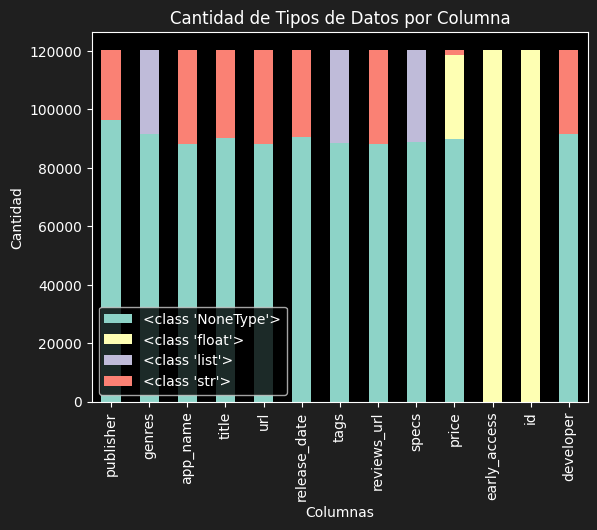

In [16]:
#Obtenemos los tipos de datos para cada elemento en el DataFrame
types_df = df_output_steam_games.applymap(lambda x: str(type(x)))

#Obtenemos la cuenta de cada tipo de dato
type_counts = types_df.apply(pd.Series.value_counts).T

#Graficamos en un gráfico de barras apiladas
type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Columnas')
plt.ylabel('Cantidad')
plt.title('Cantidad de Tipos de Datos por Columna')
plt.show()

In [17]:
#Podemos ver que la cantidad de nulos es bastante similar para las columnas
#Revisemos el dataframe
df_output_steam_games.head(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [18]:
#Contemos las filas con vacios en todas sus columnas
len(df_output_steam_games[df_output_steam_games.isnull().all(axis=1)])

88310

In [19]:
#Borramos las filas que contienen completamente nulos
df_output_steam_games.dropna(how='all', inplace=True)
#Resteamos indices
df_output_steam_games.reset_index(drop=True,inplace=True)

C:\Users\PC GABRIEL VERON\AppData\Local\Temp\ipykernel_2820\4095645747.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  types_df = df_output_steam_games.applymap(lambda x: str(type(x)))


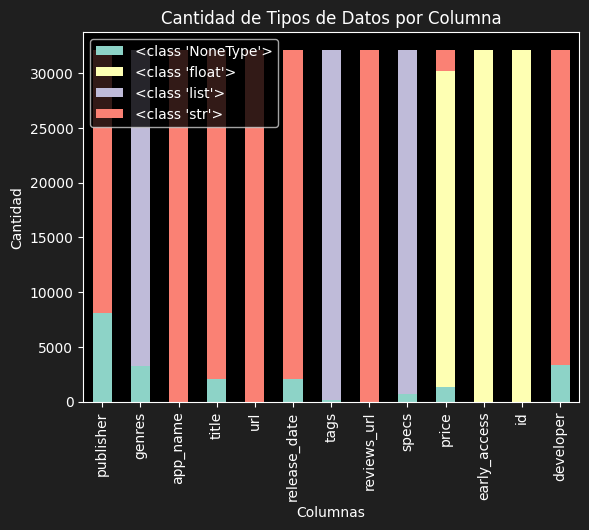

In [20]:
#Obtenemos los tipos de datos para cada elemento en el DataFrame
types_df = df_output_steam_games.applymap(lambda x: str(type(x)))

#Obtenemos la cuenta de cada tipo de dato
type_counts = types_df.apply(pd.Series.value_counts).T

#Graficamos en un gráfico de barras apiladas
type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Columnas')
plt.ylabel('Cantidad')
plt.title('Cantidad de Tipos de Datos por Columna')
plt.show()

In [21]:
#Vemos con cuantos datos nos quedamos
len(df_output_steam_games)

32135

In [22]:
#Buscamos nulos en las columnas
df_output_steam_games.isnull().sum()

publisher       8052
genres          3283
app_name           2
title           2050
url                0
release_date    2067
tags             163
reviews_url        2
specs            670
price           1377
early_access       0
id                 2
developer       3299
dtype: int64

        Empezaremos a tratar los nulos de estas columnas

**app_name**

In [23]:
#Podemos ver que la columna app_name contiene correctamente la mayoria de los nombres
#Veamos las filas que no tienen app_name
df_output_steam_games[df_output_steam_games['app_name'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
74,None,None,None,None,http://store.steampowered.com/,None,None,None,None,19.99,0.0,NaN,None
2580,None,"[Action, Indie]",None,None,http://store.steampowered.com/app/317160/_/,2014-08-26,"[Action, Indie]",http://steamcommunity.com/app/317160/reviews/?...,"[Single-player, Game demo]",None,0.0,317160.0,None


In [24]:
#Podemos ver que la fila 1 no tiene datos y la fila 2 solo le falta el nombre
#A travez de la URL obtenemos el nombre y rellenamos
df_output_steam_games['app_name'][90890]='Duet'

C:\Users\PC GABRIEL VERON\AppData\Local\Temp\ipykernel_2820\3014447797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output_steam_games['app_name'][90890]='Duet'


In [25]:
# Con esto podemos borrar el ultimo nulo de app_name
df_output_steam_games=df_output_steam_games.dropna(subset=['app_name'])

**genres**

Tenemos dos columnas que contienen generos, 'genre' y 'tags'.

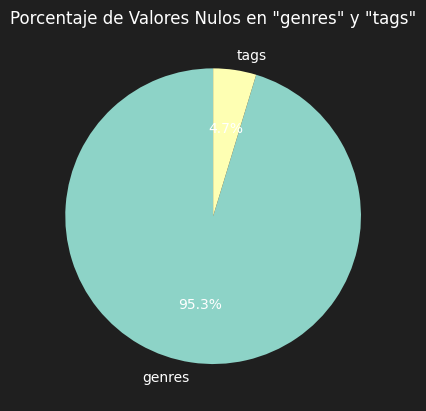

In [26]:
#Calculamos la cantidad de valores nulos en las columnas "genres" y "tags"
null_counts = df_output_steam_games[["genres", "tags"]].isnull().sum()

#Graficar el gráfico de pastel
plt.pie(null_counts, labels=null_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Valores Nulos en "genres" y "tags"')
plt.show()

In [27]:
#Veamos la cantidad de nulos 
df_output_steam_games[["genres", "tags"]].isnull().sum()

genres    3282
tags       162
dtype: int64

La columna 'genre' contiene mas nulos que 'tags', lo correcto sería utilizar la columna 'tags'

Pero 'tags' contiene generos y datos extra.

In [28]:
df_output_steam_games.loc[[5], ["genres", "tags"]]

,genres,tags
5,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ..."


Quedemonos con los generos de tags y agregemoslo a genre, para esto debemos:
1. Generar una lista con los tipos de genero de la columna 'genre'
3. Eliminamos estos "datos extra" de tags
2. Luego completamos la columna de 'genre' con los generos que estan en 'tags'

In [29]:
# 1.
generos=[]
#Quitamos nulos, duplicados y solo usamos la columna que nos interesa
no_nulos=df_output_steam_games.dropna(subset=["genres"])
no_nulos=no_nulos["genres"].drop_duplicates()
for fila in no_nulos:
    for genero in fila:
        if genero not in generos:
            generos.append(genero)
            
#Lista de generos obtenida
print(generos)

['Action', 'Casual', 'Indie', 'Simulation', 'Strategy', 'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing', 'Early Access', 'Massively Multiplayer', 'Animation &amp; Modeling', 'Video Production', 'Utilities', 'Web Publishing', 'Education', 'Software Training', 'Design &amp; Illustration', 'Audio Production', 'Photo Editing', 'Accounting']


In [30]:
# 2.
#Eliminamos de 'tags' los valores que no son generos
df_output_steam_games['tags']=df_output_steam_games['tags'].dropna().apply(lambda lista: [g for g in lista if g in generos])
#dropna() para evaluar sobre filas no nulas, apply() para aplicar mi funcion a cada fila

# 3.
#Rellenamos los faltantes de 'genre'con los valores de 'tags'
df_output_steam_games.loc[df_output_steam_games['genres'].isna() & df_output_steam_games['tags'].notnull(), 'genres']=df_output_steam_games['tags']

In [31]:
#Vemos que la cantidad de nulos en genres pasó de 3283 a 163
df_output_steam_games[["genres", "tags"]].isnull().sum()

genres    138
tags      162
dtype: int64

**developer**

In [32]:
#Nulos de ambas columnas
df_output_steam_games[['publisher', 'developer']].isnull().sum()

publisher    8050
developer    3297
dtype: int64

Vemos que hay muchos faltantes para la columna 'developer'. 

Y que la columna 'publisher' tambien contiene desarrolladoras

In [33]:
df_output_steam_games[['publisher','developer']].head(5)

,publisher,developer
0,Kotoshiro,Kotoshiro
1,"Making Fun, Inc.",Secret Level SRL
2,Poolians.com,Poolians.com
3,彼岸领域,彼岸领域
4,None,None


De 'publisher' extraeremos algunos faltantes.

In [34]:
#Veamos las filas que no tinenen developer, pero si publisher
df_output_steam_games[['publisher','developer']][df_output_steam_games['developer'].isnull() & df_output_steam_games['publisher'].notnull()]

,publisher,developer
117,Retroism,None
266,"ValuSoft, Retroism",None
304,Meridian4,None
307,"ValuSoft, Retroism",None
729,Ubisoft,None
...,...,...
30292,Ubisoft,None
30987,SEGA,None
30988,SEGA,None
30989,SEGA,None


In [35]:
#Ingresemos estos valores a developer
df_output_steam_games.loc[df_output_steam_games['developer'].isnull(),'developer']=df_output_steam_games.loc[df_output_steam_games['publisher'].notnull(), 'publisher']

In [36]:
df_output_steam_games.loc[[117, 266, 30989, 31629], ['publisher', 'developer']]

,publisher,developer
117,Retroism,Retroism
266,"ValuSoft, Retroism","ValuSoft, Retroism"
30989,SEGA,SEGA
31629,Meridian4,Meridian4


**release_date**

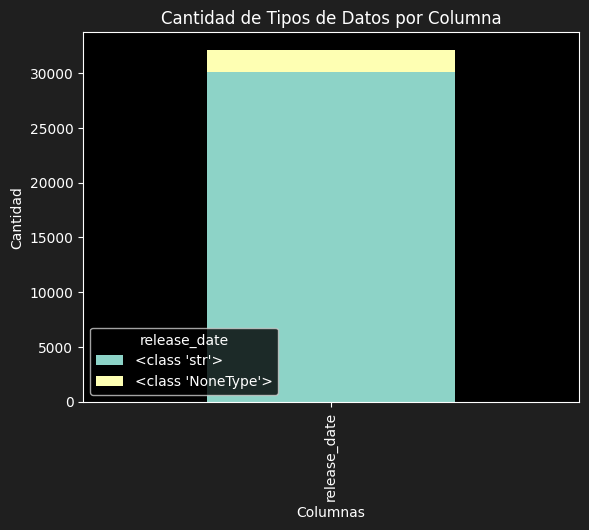

In [37]:
#Grafiquemos release_date

grafica_release=types_df[['release_date']].apply(pd.Series.value_counts).T

#Grafico de barras apiladas
grafica_release.plot(kind='bar', stacked=True)
plt.xlabel('Columnas')
plt.ylabel('Cantidad')
plt.title('Cantidad de Tipos de Datos por Columna')
plt.show()

In [38]:
#Como no tenemos otra columna de la cual extraer la fecha de lanzamiento
#Y comprobando que estos nulos son muy pocos, los eliminaremos
df_output_steam_games.dropna(subset=['release_date'], inplace=True)

        Vamos a extraer el año de lanzamiento de la columna release_date

In [39]:
#Para extraer el año de la columna release_date hay que tener en cuenta:
#Hay valores que son cadenas de texto en nuestra columna, esto nos generara errores
df_output_steam_games.loc[[1, 6737, 250, 506, 32081],['release_date']]

,release_date
1,2018-01-04
6737,Coming Soon
250,Jun 2009
506,Oct 2010
32081,Q1 2018


In [40]:
#Creamos la columna 'año_lanzamiento', la cual contendrá la primera columna resultante del split()
df_output_steam_games['año_lanzamiento'] = df_output_steam_games['release_date'].str.split('-', expand=True).drop([1,2], axis=1)

In [41]:
#Extrajimos el año del primer formato
df_output_steam_games.loc[[1, 6737, 250, 506, 32081],['año_lanzamiento']]

,año_lanzamiento
1,2018
6737,Coming Soon
250,Jun 2009
506,Oct 2010
32081,Q1 2018


In [42]:
#Ahora extraeremos el año del formato anterior
df_output_steam_games['año_lanzamiento'] = df_output_steam_games['año_lanzamiento'].str.split().str[-1]

In [43]:
df_output_steam_games.loc[[1, 6737, 250, 506, 32081],['año_lanzamiento']]

,año_lanzamiento
1,2018
6737,Soon
250,2009
506,2010
32081,2018


In [44]:
#Nos quedaron cadenas de str que indican que el producto está en desarrollo
#Como no sabemos cuando el desarrollador publicará el producto (este año, o el siguiente, etc)
#No podemos rellenar estos datos
#Procederemos a pasar la columna a formato int
df_output_steam_games['año_lanzamiento'] = pd.to_numeric(df_output_steam_games['año_lanzamiento'], errors='coerce')

In [45]:
df_output_steam_games.loc[[1, 6737, 250, 506, 32081],['año_lanzamiento']]

,año_lanzamiento
1,2018.0
6737,NaN
250,2009.0
506,2010.0
32081,2018.0


In [46]:
#Veamos cuantos juegos quedaron en desarollo
df_output_steam_games['año_lanzamiento'].isnull().sum()

111

        Ahora quitaremos las columnas innecesarias

In [47]:
df_output_steam_games.drop(['publisher', 'title', 'tags', 'specs', 'price', 'release_date', 'url', 'reviews_url', 'early_access'], inplace=True, axis=1)

In [48]:
df_output_steam_games.head(2)

,genres,app_name,id,developer,año_lanzamiento
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,761140.0,Kotoshiro,2018.0
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,643980.0,Secret Level SRL,2018.0


        Convertimos las columnas

In [49]:
df_output_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30067 entries, 0 to 32133
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           29930 non-null  object 
 1   app_name         30067 non-null  object 
 2   id               30066 non-null  float64
 3   developer        28883 non-null  object 
 4   año_lanzamiento  29956 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.4+ MB


In [50]:
df_output_steam_games['año_lanzamiento']=df_output_steam_games['año_lanzamiento'].astype('Int64')
df_output_steam_games['id']=df_output_steam_games['id'].astype('Int64')

        Eliminaremos los nulos que no pudieron ser tratados

C:\Users\PC GABRIEL VERON\AppData\Local\Temp\ipykernel_2820\4095645747.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  types_df = df_output_steam_games.applymap(lambda x: str(type(x)))


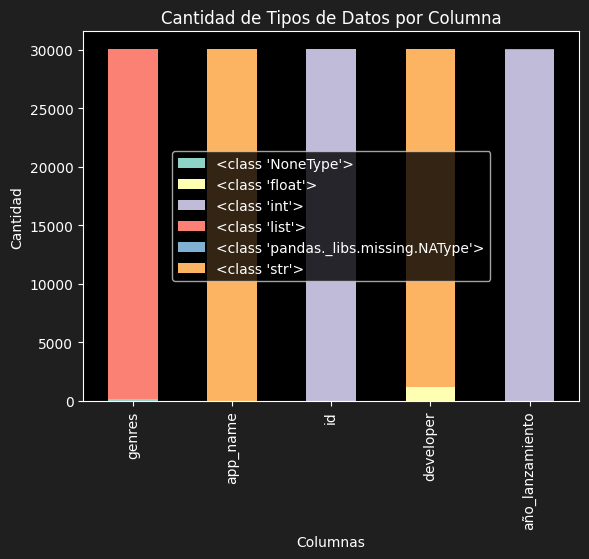

In [51]:
#Obtenemos los tipos de datos para cada elemento en el DataFrame
types_df = df_output_steam_games.applymap(lambda x: str(type(x)))

#Obtenemos la cuenta de cada tipo de dato
type_counts = types_df.apply(pd.Series.value_counts).T

#Graficamos en un gráfico de barras apiladas
type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Columnas')
plt.ylabel('Cantidad')
plt.title('Cantidad de Tipos de Datos por Columna')
plt.show()

In [52]:
#Como se puede ver en la grafica, los nulos resultantes son muy pocos comparados con los datos
df_output_steam_games.isnull().sum()

genres              137
app_name              0
id                    1
developer          1184
año_lanzamiento     111
dtype: int64

In [53]:
df_output_steam_games.dropna(inplace=True)

In [54]:
#Checamos los nulos. Y nuestro DataFrame está listo para ser exportado
df_output_steam_games.isnull().sum()

genres             0
app_name           0
id                 0
developer          0
año_lanzamiento    0
dtype: int64

        Duplicados

In [55]:
#Transformamos la columna 'genres' en str para checar duplicados
df_output_steam_games['genres'] = df_output_steam_games['genres'].apply(lambda x: str(x))
#Lo mostramos
print('Valores duplicados: ', df_output_steam_games.duplicated().sum())
#Y eliminamos
df_output_steam_games.drop_duplicates(inplace=True)

Valores duplicados:  1


In [56]:
#Volvemos al formato lista para poder trabajar
df_output_steam_games['genres'] = df_output_steam_games['genres'].apply(eval)

# Segundo DataSet

In [57]:
df_user_reviews.head(2)

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...


In [58]:
#Ahora eliminaremos columnas innecesarias
df_user_reviews.drop(['funny', 'last_edited', 'helpful', 'user_url'],inplace=True, axis=1)
df_user_reviews.head(1)

,posted,item_id,recommend,review,user_id
0,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...,76561197970982479


In [59]:
#Controlamos Nulos
df_user_reviews.isnull().sum()

posted       0
item_id      0
recommend    0
review       0
user_id      0
dtype: int64

In [60]:
#Veamos si hay filas vacias
print('Vacios en: posted',df_user_reviews['posted'][df_user_reviews.posted==''].sum())
print('Vacios en: item_id',df_user_reviews['item_id'][df_user_reviews.posted==''].sum())
print('Vacios en: review',df_user_reviews['review'][df_user_reviews.posted==''].sum())
print('Vacios en: user_id',df_user_reviews['user_id'][df_user_reviews.posted==''].sum())

Vacios en: posted 0
Vacios en: item_id 0
Vacios en: review 0
Vacios en: user_id 0


In [61]:
#Vemos la cantidad de duplicados
df_user_reviews.duplicated().sum()

874

In [62]:
#Y los borramos duplicados
df_user_reviews.drop_duplicates(inplace=True)

Veamos la columna que contiene las fechas

In [63]:
df_user_reviews.posted

0         Posted November 5, 2011.
1            Posted July 15, 2011.
2           Posted April 21, 2011.
3            Posted June 24, 2014.
4        Posted September 8, 2013.
                   ...            
59300              Posted July 10.
59301               Posted July 8.
59302               Posted July 3.
59303              Posted July 20.
59304               Posted July 2.
Name: posted, Length: 58431, dtype: object

In [64]:
#Quitamos las , y . 
df_user_reviews['año']=df_user_reviews['posted'].str.replace('[,.]', '', regex=True)
#Dividimos los datos y nos quedamos con la ultima
df_user_reviews['año'] = df_user_reviews['año'].str.split(' ', expand=True)[3]

In [65]:
#Veamos si hay nulos en nuestra nueva columna año
df_user_reviews['año'].isnull().sum()

9933

In [66]:
#Estos nulos se generan debido a este tipo de dato
df_user_reviews['posted'][59300]

'Posted July 10.'

In [67]:
#Este se debe a que steam no guarda el año en el que la review se hizo

In [68]:
#Veremos cual es el ultimo año
df_user_reviews['año'] = pd.to_numeric(df_user_reviews['año'], errors='coerce')
print(df_user_reviews['año'].max())

2015.0


In [69]:
#Rellenamos estos nulos con el ultimo año
df_user_reviews['año'][df_user_reviews['año'].isnull()]=2015

C:\Users\PC GABRIEL VERON\AppData\Local\Temp\ipykernel_2820\447717112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews['año'][df_user_reviews['año'].isnull()]=2015


Hacemos el analisis de sentimiento con la libreria TextBlob

In [71]:
from textblob import TextBlob

In [72]:
df_user_reviews['sentiment_analysis'] = df_user_reviews['review'].apply(lambda x: 2 if TextBlob(str(x)).sentiment.polarity > 0 
                                                                           else (1 if TextBlob(str(x)).sentiment.polarity == 0 
                                                                                 else 0))

In [73]:
print(df_user_reviews[['review', 'sentiment_analysis']].head())

                                              review  sentiment_analysis
0  Simple yet with great replayability. In my opi...                   2
1               It's unique and worth a playthrough.                   2
2  Great atmosphere. The gunplay can be a bit chu...                   2
3  I know what you think when you see this title ...                   2
4  For a simple (it's actually not all that simpl...                   0


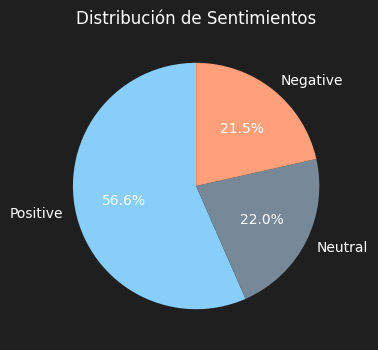

In [74]:
# Contar las ocurrencias de cada categoría
sentiment_counts = df_user_reviews['sentiment_analysis'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(4, 4))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%',labels=['Positive', 'Neutral', 'Negative'], colors=['lightskyblue', 'lightslategray', 'lightsalmon'], startangle=90)
plt.title('Distribución de Sentimientos')
plt.ylabel('')
plt.show()

        Eliminamos columnas innecesarias

In [75]:
df_user_reviews.drop(['posted', 'review'], inplace=True, axis=1)

        Convertimos las columnas

In [76]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             58431 non-null  object 
 1   recommend           58431 non-null  bool   
 2   user_id             58431 non-null  object 
 3   año                 58431 non-null  float64
 4   sentiment_analysis  58431 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 4.3+ MB


In [77]:
df_user_reviews['año']=df_user_reviews['año'].astype(int)
df_user_reviews['item_id']=df_user_reviews['item_id'].astype(int)

In [78]:
#Checamos nulos. Y nuestro dataframe esta listo para ser exportado
df_user_reviews.isnull().sum()

item_id               0
recommend             0
user_id               0
año                   0
sentiment_analysis    0
dtype: int64

# Nos queda nuestro ultimo DataSet

In [79]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   user_id           object
 5   user_url          object
 6   items_count       int64 
dtypes: int64(3), object(4)
memory usage: 275.2+ MB


In [80]:
#Checamos nulos
df_user_items.isnull().sum()

item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
user_id             0
user_url            0
items_count         0
dtype: int64

In [81]:
#Contamos la cantidad de posibles vacios
print('Vacios en')
print('item_id: ', len(df_user_items[df_user_items['item_id']=='']))
print('item_name: ', len(df_user_items[df_user_items['item_name']=='']))
print('playtime_forever: ', len(df_user_items[df_user_items['playtime_forever']=='']))
print('playtime_2weeks: ', len(df_user_items[df_user_items['playtime_2weeks']=='']))
print('user_id: ', len(df_user_items[df_user_items['user_id']=='']))
print('user_url: ', len(df_user_items[df_user_items['user_url']=='']))
print('items_count: ', len(df_user_items[df_user_items['items_count']=='']))

Vacios en
item_id:  0
item_name:  0
playtime_forever:  0
playtime_2weeks:  0
user_id:  0
user_url:  0
items_count:  0


In [82]:
#Checamos duplicados
df_user_items.duplicated().sum()

59104

In [83]:
#Los quitamos
df_user_items.drop_duplicates(inplace=True)

In [84]:
#Cambiamos a int la columna item_id
df_user_items['item_id']=df_user_items['item_id'].astype(int)

In [85]:
#Eliminamos columnas innecesarias
df_user_items.drop(['playtime_2weeks', 'user_url'],inplace=True,axis=1)

        Exportamos los DataSet

In [86]:
import os
if not os.path.exists('Dataset_Limpio'):
    os.makedirs('Dataset_Limpio')

In [88]:
df_output_steam_games.to_parquet('Dataset_Limpio/output_steam_games.parquet', index=False)
df_user_reviews.to_parquet('Dataset_Limpio/user_reviews.parquet', index=False)
df_user_items.to_parquet('Dataset_Limpio/user_items.parquet', index=False)